Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

In [2]:
%matplotlib inline

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

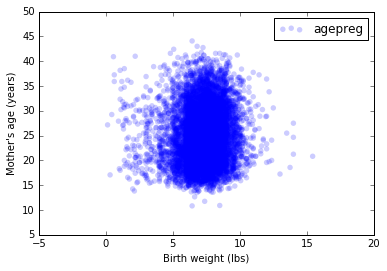

In [4]:
import nsfg
import thinkstats2
import thinkplot
df = nsfg.ReadFemPreg()
thinkplot.Scatter(df.totalwgt_lb, df.agepreg)
thinkplot.Show(xlabel="Birth weight (lbs)", ylabel="Mother's age (years)")

(1, 7)
(2, 40)
(3, 53)
(4, 98)
(5, 227)
(6, 692)
(7, 2214)
(8, 3031)
(9, 1881)
(10, 620)
(11, 132)
(12, 26)
(13, 10)
(14, 3)
(15, 3)
(16, 1)
[0.5178571428571429, 1.4671875, 2.4056603773584904, 3.3845663265306123, 4.43557268722467, 5.485368497109826, 6.469653342366757, 7.441087924777301, 8.39709595959596, 9.353225806451613, 10.287878787878787, 11.288461538461538, 12.1625, 13.416666666666666, 14.0, 15.4375]


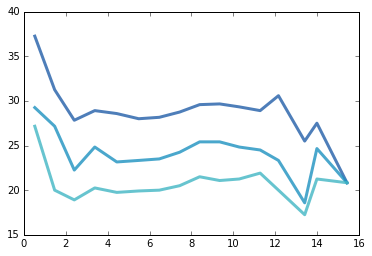

In [13]:
import numpy as np
df = df.dropna(subset=['totalwgt_lb', 'agepreg']) #get rid of columns with NaN
bins = np.arange(0, 20, 1) # create numpy bins
indices = np.digitize(df.totalwgt_lb, bins) #find bin index for each weight
groups = df.groupby(indices) 
for i, group in groups:
    print(i, len(group)) # go through each group, show how many in each category
    # so this is basically a homemade histogram / value counts with self defined bins?
    
birthweights = [group.totalwgt_lb.mean() for i, group in groups] # computes mean birth weight for each bin
print birthweights
cdfs = [thinkstats2.Cdf(group.agepreg) for i, group in groups]
for percent in [75, 50, 25]:
    ages = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(birthweights, ages, label=label)

This graph shows that between about 4lbs and 11lbs, there is almost no correlation between the data - horizontal lines mean a lack of correlation.  On the extremes, very few babies fall into thise bins (according to the value counts of bin sizes), so they're not really relevant to the correlative properties

In [16]:
print "Pearson correlation:", thinkstats2.Corr(df.totalwgt_lb, df.agepreg)
print "Spearman correlation:", thinkstats2.SpearmanCorr(df.totalwgt_lb, df.agepreg)

Pearson correlation: 0.0688339703541
Spearman correlation: 0.0946100410966


Both correlations are close to zero, confirming what we learned from the scatterplot and percentiles plot that there is little relationship between these two variables.  The Spearman correlation is slightly higher than the Pearson one, which might be the result of Spearman's number trying to mitigate the effects of outliers.  Looking at the scatterplot of the bins from the percentiles, we can see there are a couple, like the 1lb and 16lb points.  Treatment of outliers might account for the differences between the numbers, which is still pretty slight

Based on all this, I would definitely say that there is no relationship between these variables.  The weights of the babies seem clustered around 5-10 pounds, regardless of the age of the mother.